In [1]:
import pandas as pd
import seaborn as sns
import missingno as msnum

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
rejected = pd.read_csv('Data/rejected.csv')

In [4]:
rejected.isnull().sum()

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

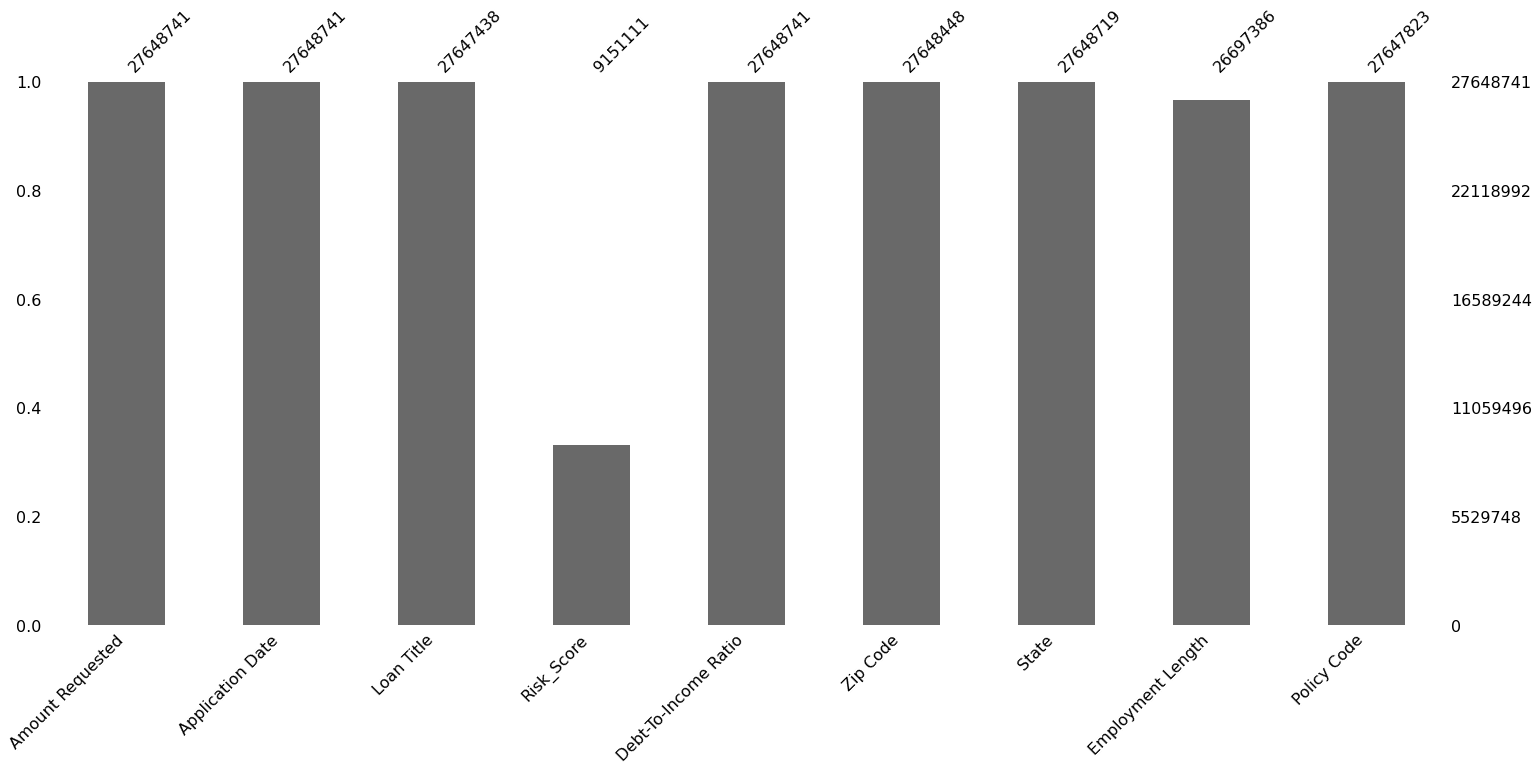

In [5]:
msnum.bar(rejected);

In [6]:
r = rejected.dropna().reset_index(drop=True)

In [7]:
r

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0
...,...,...,...,...,...,...,...,...,...
8992190,30000.0,2016-12-31,Debt consolidation,681.0,55.15%,726xx,AR,< 1 year,0.0
8992191,1000.0,2016-12-31,Debt consolidation,531.0,31.31%,761xx,TX,< 1 year,0.0
8992192,10000.0,2016-12-31,Debt consolidation,590.0,41.26%,441xx,OH,< 1 year,0.0
8992193,1200.0,2016-12-31,Other,686.0,10.26%,914xx,CA,< 1 year,0.0


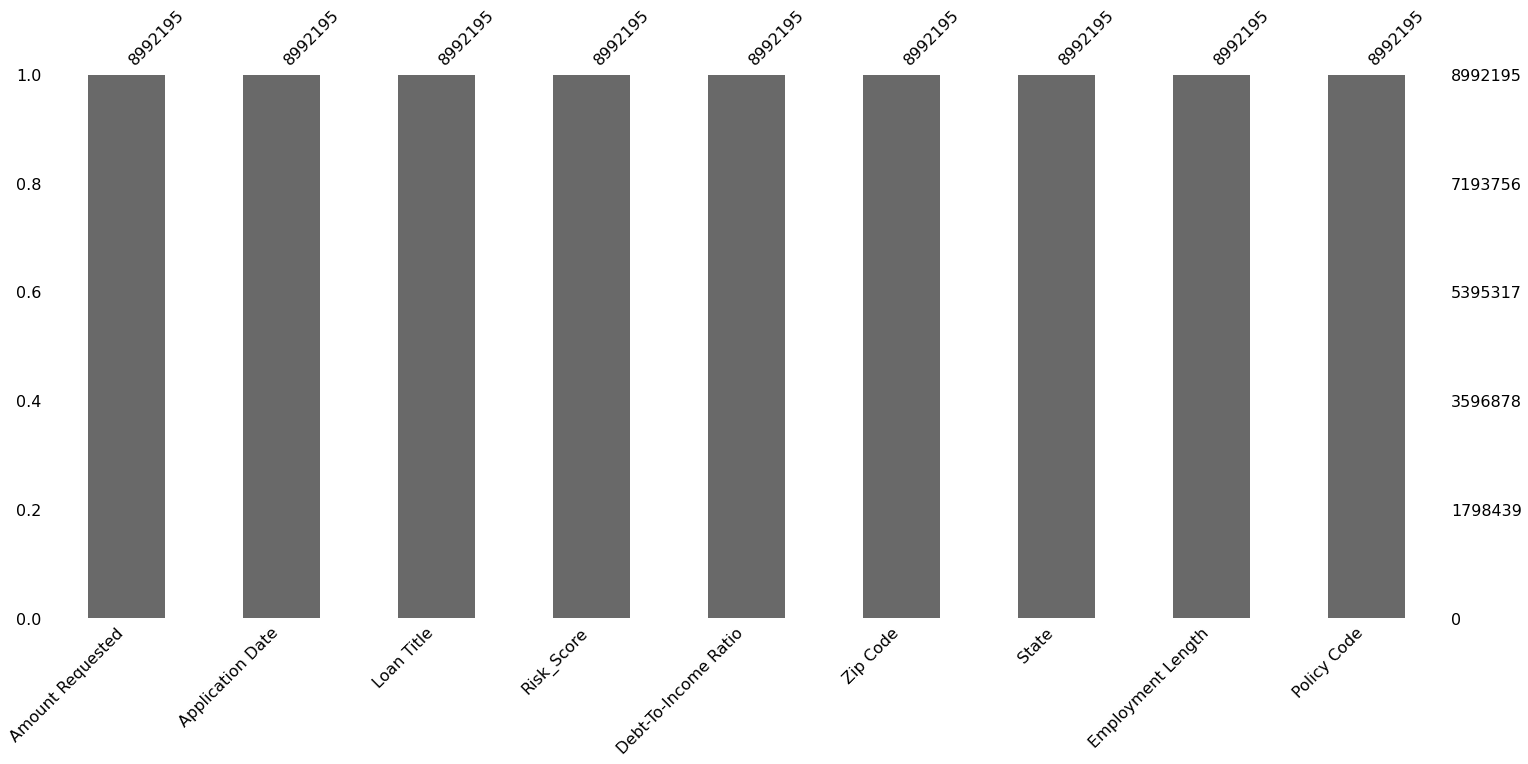

In [8]:
msnum.bar(r);

In [9]:
r[['Risk_Score', 'Debt-To-Income Ratio', 'Employment Length']]

,Risk_Score,Debt-To-Income Ratio,Employment Length
0,693.0,10%,4 years
1,703.0,10%,< 1 year
2,715.0,10%,1 year
3,698.0,38.64%,< 1 year
4,509.0,9.43%,< 1 year
...,...,...,...
8992190,681.0,55.15%,< 1 year
8992191,531.0,31.31%,< 1 year
8992192,590.0,41.26%,< 1 year
8992193,686.0,10.26%,< 1 year


In [10]:
r.dtypes

Amount Requested        float64
Application Date         object
Loan Title               object
Risk_Score              float64
Debt-To-Income Ratio     object
Zip Code                 object
State                    object
Employment Length        object
Policy Code             float64
dtype: object

In [11]:
r = r[['Risk_Score', 'Debt-To-Income Ratio']]
r

,Risk_Score,Debt-To-Income Ratio
0,693.0,10%
1,703.0,10%
2,715.0,10%
3,698.0,38.64%
4,509.0,9.43%
...,...,...
8992190,681.0,55.15%
8992191,531.0,31.31%
8992192,590.0,41.26%
8992193,686.0,10.26%


In [12]:
r = r.rename(columns={"Debt-To-Income Ratio":"DI"})

In [13]:
r

,Risk_Score,DI
0,693.0,10%
1,703.0,10%
2,715.0,10%
3,698.0,38.64%
4,509.0,9.43%
...,...,...
8992190,681.0,55.15%
8992191,531.0,31.31%
8992192,590.0,41.26%
8992193,686.0,10.26%


In [14]:
r['DI'] = r['DI'].str.rstrip("%").astype(float)/100

In [15]:
r

,Risk_Score,DI
0,693.0,0.1000
1,703.0,0.1000
2,715.0,0.1000
3,698.0,0.3864
4,509.0,0.0943
...,...,...
8992190,681.0,0.5515
8992191,531.0,0.3131
8992192,590.0,0.4126
8992193,686.0,0.1026


In [16]:
r = r.assign(Accepted = 0)
r

,Risk_Score,DI,Accepted
0,693.0,0.1000,0
1,703.0,0.1000,0
2,715.0,0.1000,0
3,698.0,0.3864,0
4,509.0,0.0943,0
...,...,...,...
8992190,681.0,0.5515,0
8992191,531.0,0.3131,0
8992192,590.0,0.4126,0
8992193,686.0,0.1026,0


In [17]:
r.dtypes

Risk_Score    float64
DI            float64
Accepted        int64
dtype: object

In [18]:
r.describe()

,Risk_Score,DI,Accepted
count,8.992195e+06,8.992195e+06,8992195.0
mean,6.273498e+02,1.695741e+00,0.0
std,8.993268e+01,1.776824e+02,0.0
min,0.000000e+00,-1.000000e-02,0.0
25%,5.910000e+02,9.060000e-02,0.0
50%,6.360000e+02,2.055000e-01,0.0
75%,6.740000e+02,3.626000e-01,0.0
max,9.900000e+02,5.000003e+05,0.0


In [27]:
accepted = pd.read_csv('Data/accepted.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
accepted

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.00,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.00,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,793

In [43]:
a = accepted[['loan_amnt', 'issue_d', 'purpose', 'fico_range_low', 
          'fico_range_high', 'annual_inc', 'emp_length', 'addr_state', 'policy_code']]

In [47]:
a.shape

(2260701, 9)

In [46]:
a[a.annual_inc == 0] 

,loan_amnt,issue_d,purpose,fico_range_low,fico_range_high,annual_inc,emp_length,addr_state,policy_code
18202,20000.0,Dec-2015,debt_consolidation,685.0,689.0,0.0,NaN,TX,1.0
65620,3700.0,Nov-2015,credit_card,680.0,684.0,0.0,NaN,TX,1.0
421705,40000.0,Mar-2018,home_improvement,695.0,699.0,0.0,NaN,TX,1.0
422321,40000.0,Mar-2018,debt_consolidation,755.0,759.0,0.0,NaN,WA,1.0
422379,3000.0,Mar-2018,other,790.0,794.0,0.0,2 years,AR,1.0
...,...,...,...,...,...,...,...,...,...
2228436,8750.0,Oct-2016,debt_consolidation,715.0,719.0,0.0,NaN,AR,1.0
2228456,18000.0,Oct-2016,debt_consolidation,680.0,684.0,0.0,< 1 year,NY,1.0
2230378,10000.0,Oct-2016,credit_card,705.0,709.0,0.0,NaN,MD,1.0
2232830,23950.0,Oct-2016,debt_consolidation,670.0,674.0,0.0,NaN,IL,1.0


In [51]:
a = a.drop(a[a.annual_inc == 0].index)

In [52]:
a = a.assign(FICO = (a['fico_range_low'] + a['fico_range_high'])/2)

In [53]:
a = a.assign(Accepted = 1)

In [54]:
a = a.rename(columns={"FICO":"Risk_Score"})

In [55]:
a = a.assign(DI = (a['loan_amnt'] / a['annual_inc']))

In [56]:
a = a[['Risk_Score', 'DI', 'Accepted']]

In [57]:
a

,Risk_Score,DI,Accepted
0,677.0,0.065455,1
1,717.0,0.380000,1
2,697.0,0.317460,1
3,787.0,0.318182,1
4,697.0,0.099585,1
...,...,...,...
2260696,707.0,0.176211,1
2260697,662.0,0.218182,1
2260698,662.0,0.147368,1
2260699,NaN,NaN,1


In [58]:
a.isna().sum()

Risk_Score    33
DI            37
Accepted       0
dtype: int64

In [59]:
a = a.dropna()

In [60]:
a.isna().sum()

Risk_Score    0
DI            0
Accepted      0
dtype: int64

In [61]:
a.describe()

,Risk_Score,DI,Accepted
count,2.258997e+06,2.258997e+06,2258997.0
mean,7.005790e+02,5.738792e-01,1.0
std,3.300490e+01,8.876415e+01,0.0
min,6.120000e+02,1.612903e-04,1.0
25%,6.770000e+02,1.250000e-01,1.0
50%,6.920000e+02,2.000000e-01,1.0
75%,7.170000e+02,2.985075e-01,1.0
max,8.475000e+02,4.000000e+04,1.0


In [62]:
a.shape

(2258997, 3)

In [74]:
combo = pd.concat([a,r]).reset_index(drop=True)
combo

,Risk_Score,DI,Accepted
0,677.0,0.065455,1
1,717.0,0.380000,1
2,697.0,0.317460,1
3,787.0,0.318182,1
4,697.0,0.099585,1
...,...,...,...
11251187,681.0,0.551500,0
11251188,531.0,0.313100,0
11251189,590.0,0.412600,0
11251190,686.0,0.102600,0


In [75]:
combo.describe()

,Risk_Score,DI,Accepted
count,1.125119e+07,1.125119e+07,1.125119e+07
mean,6.420526e+02,1.470495e+00,2.007785e-01
std,8.685177e+01,1.637510e+02,4.005827e-01
min,0.000000e+00,-1.000000e-02,0.000000e+00
25%,6.040000e+02,1.000000e-01,0.000000e+00
50%,6.540000e+02,2.038000e-01,0.000000e+00
75%,6.890000e+02,3.458000e-01,0.000000e+00
max,9.900000e+02,5.000003e+05,1.000000e+00


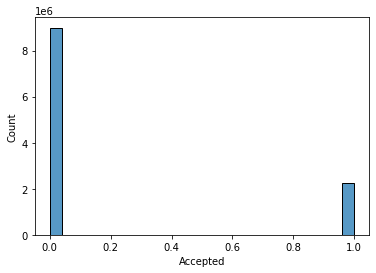

In [76]:
sns.histplot(data=combo, x='Accepted');

In [77]:
few = combo.groupby('Accepted', group_keys=False).apply(lambda x: x.sample(frac=0.001))

In [78]:
few.describe()

,Risk_Score,DI,Accepted
count,11251.000000,11251.000000,11251.000000
mean,641.101858,0.986371,0.200782
std,88.546971,24.281594,0.400603
min,0.000000,-0.010000,0.000000
25%,604.000000,0.100000,0.000000
50%,654.000000,0.204700,0.000000
75%,688.000000,0.350000,0.000000
max,914.000000,1999.980000,1.000000


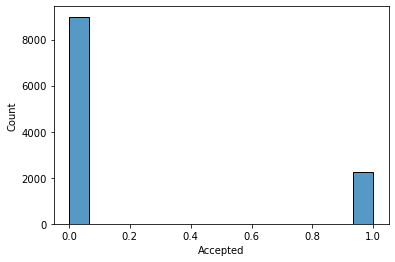

In [79]:
sns.histplot(data=few, x='Accepted');

In [80]:
few.isna().sum()

Risk_Score    0
DI            0
Accepted      0
dtype: int64

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
X = few.drop(columns=['Accepted'])

In [83]:
y = few.Accepted

In [84]:
y

4152239     0
10810740    0
9107940     0
3596957     0
2989836     0
           ..
855812      1
1464777     1
1150769     1
821569      1
273261      1
Name: Accepted, Length: 11251, dtype: int64

In [85]:
X

,Risk_Score,DI
4152239,0.0,0.000000
10810740,668.0,0.294800
9107940,668.0,0.095000
3596957,629.0,0.055200
2989836,639.0,2.587400
...,...,...
855812,722.0,0.435500
1464777,717.0,0.215385
1150769,667.0,0.081250
821569,747.0,0.133333


In [86]:
LR = LogisticRegression()

In [87]:
LR.fit(X,y)

LogisticRegression()

In [93]:
score = LR.score(X,y)
score

0.7866856279441827

In [90]:
predictions = LR.predict(X)

In [89]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [91]:
cm = metrics.confusion_matrix(y, predictions)
print(cm)

[[8456  536]
 [1864  395]]


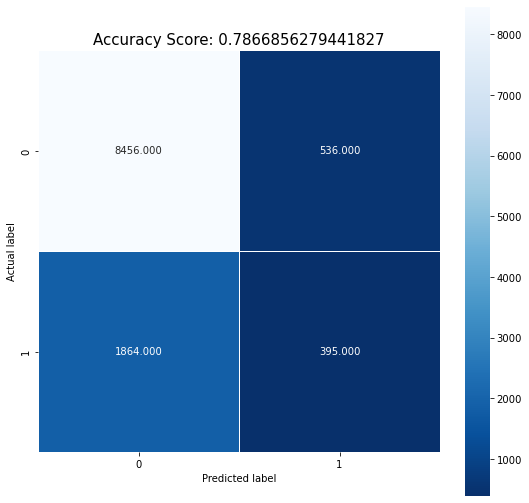

In [94]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [95]:
importance = LR.coef_[0]
importance

array([ 0.02285477, -1.52884336])

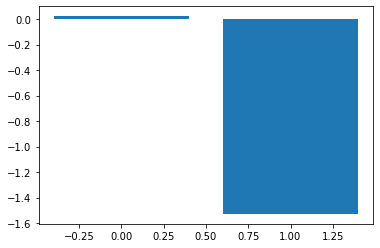

In [98]:
plt.bar([x for x in range(len(importance))], importance);